In [1]:
import gym
env = gym.make("CartPole-v1",render_mode = "rgb_array")

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
obs, info = env.reset(seed = 42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

obs로 반환되는것은 1D Numpy 배열이고 4개의 실수를 포함한다. 첫번째부터 순서대로 카트의 수평 위치를,(0.0 = center)
오른쪽으로 양수를 나타내는 속도를, pole의 각도를, 그 pole의 각속도를 나타낸다

render()로 이미지로서 환경을 렌더링한다

In [3]:
img = env.render()
img.shape               # height, width, channels

(400, 600, 3)

In [4]:
env.action_space

Discrete(2)

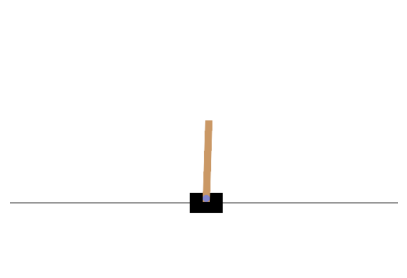

In [10]:
plt.figure(figsize = (5,4))
plt.imshow(img)
plt.axis("off")
plt.show()

0과1을 포함하고있다는 뜻이며 좌측이나 우측으로 가속을 한다는 의미

In [5]:
action = 1      # 오른쪽으로 가속
obs, reward, done, truncated, info = env.step(action)
# step함수는 액션을 취하고 그것에 대한 5가지 결과값을 반환한다
print(obs)
print(reward)
print(done)
print(truncated)
print(info)

[ 0.02727336  0.18847767  0.03625453 -0.26141977]
1.0
False
False
{}


c:\Users\leeyj\venv\rl_venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


obs  
새로운 관측값. 카트가 오른쪽 방향으로 움직인다(obs[1]>0). 막대가 여전히 오른쪽 방향으로 기울어져 있다(obs[2]>0).  
각속도가 음수가 되었으므로(obs[3]<0) 다음 스탭 후에는 왼쪽으로 기울어질 가능성이 크다  
reward  
이 환경에서는 어떤 행동을 실행해도 매 스탭마다 1.0의 보상을 받는다  
done  
이 값이 True면 게임이 끝난것이다. 막대가 너무 기울어지거나 화면 밖으로 나가거나 200스탭 이상이 지나면 게임이 끝난것이다  
truncated  
갑작스럽게 게임이 조기 종료된다면 이 값이 참이된다. 예를들면 시간 제한에 도달하거나 개체가 경계를 벗어난 경우  
info  
다른 환경에서는 이 딕셔너리에 디버깅이나 훈련에 유용한 추가적인 정보가 담길 수 있다

In [11]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break

    totals.append(episode_rewards)

In [13]:
np.mean(totals), np.std(totals), min(totals), max(totals)

(41.698, 8.389445512070509, 24.0, 63.0)

500번의 반복을 지정했지만 카트 pole을 세우는것이 63번을 통과하지 못했다

In [17]:
# 추가 코드 - 이 셀은 한 에피소드의 애니메이션을 표시합니다.

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)

show_one_episode(basic_policy)

c:\Users\leeyj\venv\rl_venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
